In [1]:
import pandas as pd
import numpy as np
from pylab import plot, show
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
import os
import math
import pandas as pd
from matplotlib import pyplot as PLT
from matplotlib import mlab as ML
from scipy.stats.stats import pearsonr
from scipy.stats import ttest_ind

% pylab inline
os.getcwd()

Populating the interactive namespace from numpy and matplotlib


'/Users/isaacpark/Dropbox/Herbarium_2017/Pheno_Assessed_3/FrostRisk/Data_ForSharing'

In [2]:
#Read in specimen Data
rawData = pd.read_csv('specimenData.csv') #change name to match specimen input data

####
# Accepted_name_species = species name
# DOY = Day of year on which specimen was collected
# Year = Year on which specimen was collected
# bFFP_Annual = Date of the beginning of the frost-free period at the location and year from which specimen was collected
# bFFP_Normal = Normal Date of the beginning of the frost-free period at the location from which specimen was collected (based on 1901-1990 Normals)


print len(rawData)
rawData.head()

670908


,Accepted_name_species,DOY,Year,bFFP_Annual,bFFP_Normal
0,Garrya elliptica,93.0,1920.0,76.0,62.333333
1,Anemone tuberosa,105.0,1920.0,125.0,119.666667
2,Perityle emoryi,74.0,1920.0,40.0,42.333333
3,Monoptilon bellioides,110.0,1920.0,104.0,89.666667
4,Plantago ovata,63.0,1920.0,51.0,45.666667


In [3]:
#Create field for evaluating magnitude of annual deviations from bffp normals
rawData['bFFP_ClimDiff'] = rawData['bFFP_Annual'] - rawData['bFFP_Normal']

#Create field marking whether a specimen was collected prior to the onset of the frost-free period
rawData['bFFP_Diff'] = rawData['DOY'] - rawData['bFFP_Annual']

#Create field marking mean collection date for all specimens of each species
bffP_Group = rawData.groupby(by = ['Accepted_name_species']).mean()
bffP_Group = bffP_Group.reset_index()
bffP_Group['DOY_SpecMean'] = bffP_Group['DOY']
bffP_Group['bFFP_Diff_SpecMean'] = bffP_Group['bFFP_Diff']
bffP_Group = bffP_Group.loc[:, ['Accepted_name_species', 'bFFP_Diff_SpecMean', 'DOY_SpecMean']]
print len(rawData)


670908


In [4]:
#Merge mean collection dates back into main data
rawData = pd.merge(rawData, bffP_Group, on = ['Accepted_name_species'], how = 'left')
print len(rawData)
rawData.head()

670908


,Accepted_name_species,DOY,Year,bFFP_Annual,bFFP_Normal,bFFP_ClimDiff,bFFP_Diff,bFFP_Diff_SpecMean,DOY_SpecMean
0,Garrya elliptica,93.0,1920.0,76.0,62.333333,13.666667,17.0,34.384615,86.723077
1,Anemone tuberosa,105.0,1920.0,125.0,119.666667,5.333333,-20.0,3.375000,87.464844
2,Perityle emoryi,74.0,1920.0,40.0,42.333333,-2.333333,34.0,45.504630,86.013889
3,Monoptilon bellioides,110.0,1920.0,104.0,89.666667,14.333333,6.0,37.139535,84.048837
4,Plantago ovata,63.0,1920.0,51.0,45.666667,5.333333,12.0,37.656987,86.152450


In [5]:
def frostChecker_bffp(row):  #check if bFFP occurred after flowering onset
    if row["bFFP_Annual"] < row['DOY']:
        return 0
    else:
        return 1


rawData["Frost_Suffered"] = rawData.apply(frostChecker_bffp, axis=1)



In [6]:
rawData.head()

,Accepted_name_species,DOY,Year,bFFP_Annual,bFFP_Normal,bFFP_ClimDiff,bFFP_Diff,bFFP_Diff_SpecMean,DOY_SpecMean,Frost_Suffered
0,Garrya elliptica,93.0,1920.0,76.0,62.333333,13.666667,17.0,34.384615,86.723077,0
1,Anemone tuberosa,105.0,1920.0,125.0,119.666667,5.333333,-20.0,3.375000,87.464844,1
2,Perityle emoryi,74.0,1920.0,40.0,42.333333,-2.333333,34.0,45.504630,86.013889,0
3,Monoptilon bellioides,110.0,1920.0,104.0,89.666667,14.333333,6.0,37.139535,84.048837,0
4,Plantago ovata,63.0,1920.0,51.0,45.666667,5.333333,12.0,37.656987,86.152450,0


In [7]:
def EightiesClasser(row):  #check if bFFP occurred after flowering onset
    if row["Year"] < 1980:
        return 0
    else:
        return 1
    
rawData["Eighties"] = rawData.apply(EightiesClasser, axis=1)


In [8]:
#Output Data
rawData.to_csv('SpecimenData_prePost1980.csv')
rawData.head()

,Accepted_name_species,DOY,Year,bFFP_Annual,bFFP_Normal,bFFP_ClimDiff,bFFP_Diff,bFFP_Diff_SpecMean,DOY_SpecMean,Frost_Suffered,Eighties
0,Garrya elliptica,93.0,1920.0,76.0,62.333333,13.666667,17.0,34.384615,86.723077,0,0
1,Anemone tuberosa,105.0,1920.0,125.0,119.666667,5.333333,-20.0,3.375000,87.464844,1,0
2,Perityle emoryi,74.0,1920.0,40.0,42.333333,-2.333333,34.0,45.504630,86.013889,0,0
3,Monoptilon bellioides,110.0,1920.0,104.0,89.666667,14.333333,6.0,37.139535,84.048837,0,0
4,Plantago ovata,63.0,1920.0,51.0,45.666667,5.333333,12.0,37.656987,86.152450,0,0


In [9]:

#Output species means for all fields
groupData = rawData.groupby(by = ['Accepted_name_species', "Eighties"]).mean()
groupData.to_csv('SpeciesMeans_Phylo_1980Split.csv')
groupData.head()

DOY         Year  bFFP_Annual  \
Accepted_name_species Eighties                                         
Abronia elliptica     0         145.409836  1956.229508   112.442623   
                      1         152.653846  2000.038462   121.692308   
Abronia latifolia     0         174.487805  1943.463415    64.975610   
                      1         196.500000  1999.181818    61.590909   
Abronia maritima      0         141.028571  1942.971429    15.971429   

                                bFFP_Normal  bFFP_ClimDiff   bFFP_Diff  \
Accepted_name_species Eighties                                           
Abronia elliptica     0          114.672131      -2.229508   32.967213   
                      1          128.076923      -6.384615   30.961538   
Abronia latifolia     0           66.487805      -1.512195  109.512195   
                      1           77.772727     -16.181818  134.909091   
Abronia maritima      0           12.838095       3.133333  125.057143   

                                bFFP_Diff_SpecMean  DOY_SpecMean  \
Accepted_name_species Eighties                                     
Abronia elliptica     0                  32.044248    148.743363   
                      1                  32.044248    148.743363   
Abronia latifolia     0                 118.380952    182.174603   
                      1                 118.380952    182.174603   
Abronia maritima      0                 120.240741    133.592593   

                                Frost_Suffered  
Accepted_name_species Eighties                  
Abronia elliptica     0               0.114754  
                      1               0.134615  
Abronia latifolia     0               0.024390  
                      1               0.000000  
Abronia maritima      0               0.000000

In [10]:
#Calculate number of samples of each species collected prior to 1980

pre80Data = rawData[rawData['Eighties'] ==0]
pre80Data['Dummy'] = 1
pre80Data = pre80Data.loc[:,['Accepted_name_species', 'Dummy']]
pre80Samples = pre80Data.groupby(by= ['Accepted_name_species']).sum()
pre80Samples['SampleCount_Pre1980'] = pre80Samples['Dummy']
del pre80Samples['Dummy']
pre80Samples = pre80Samples.reset_index()
pre80Samples.head()


/Users/isaacpark/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Accepted_name_species,SampleCount_Pre1980
0,Abronia elliptica,61
1,Abronia latifolia,41
2,Abronia maritima,35
3,Abronia mellifera,29
4,Abronia pogonantha,39


In [11]:
#Merge specieswide counts of pre-1980 collections into specimen data
rawData = pd.merge(rawData, pre80Samples, on = ['Accepted_name_species'], how = 'left')


In [12]:
#Calculate number of samples of each species collected after 1979

post80Data = rawData[rawData['Eighties'] ==1]
post80Data['Dummy'] = 1
post80Data = post80Data.loc[:,['Accepted_name_species', 'Dummy']]
post80Samples = post80Data.groupby(by= ['Accepted_name_species']).sum()
post80Samples['SampleCount_Post1980'] = post80Samples['Dummy']
del post80Samples['Dummy']
post80Samples = post80Samples.reset_index()
post80Samples.head()

/Users/isaacpark/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Accepted_name_species,SampleCount_Post1980
0,Abronia elliptica,52
1,Abronia latifolia,22
2,Abronia maritima,19
3,Abronia mellifera,32
4,Abronia pogonantha,26


In [13]:
#Merge specieswide counts of pre-1980 collections into specimen data
rawData = pd.merge(rawData, post80Samples, on = ['Accepted_name_species'], how = 'left')


In [14]:
#Trim data to exclude specimens of species for which <50 specimens were collected either priot to 1980 or post-1979
trimData = rawData[((rawData['SampleCount_Pre1980']>=50) & (rawData['SampleCount_Post1980']>=50))]
trimData.to_csv('Frost_Data_Trimmed_50SampleMin_1980Split.csv')
trimData.head()


,Accepted_name_species,DOY,Year,bFFP_Annual,bFFP_Normal,bFFP_ClimDiff,bFFP_Diff,bFFP_Diff_SpecMean,DOY_SpecMean,Frost_Suffered,Eighties,SampleCount_Pre1980,SampleCount_Post1980
1,Anemone tuberosa,105.0,1920.0,125.0,119.666667,5.333333,-20.0,3.375000,87.464844,1,0,171.0,85.0
2,Perityle emoryi,74.0,1920.0,40.0,42.333333,-2.333333,34.0,45.504630,86.013889,0,0,197.0,235.0
3,Monoptilon bellioides,110.0,1920.0,104.0,89.666667,14.333333,6.0,37.139535,84.048837,0,0,244.0,186.0
4,Plantago ovata,63.0,1920.0,51.0,45.666667,5.333333,12.0,37.656987,86.152450,0,0,277.0,274.0
5,Lupinus arizonicus,92.0,1920.0,53.0,46.333333,6.666667,39.0,39.258824,77.854902,0,0,97.0,158.0


In [15]:
#********************

In [16]:
#output species means, split between pre-1980 and post-1979 specimens
groupData = trimData.groupby(by = ['Accepted_name_species', "Eighties"]).mean()
groupData.reset_index(inplace = True)
groupData.to_csv('Frost_Data_SpeciesMeans_50SampleMin_1980Split.csv')
groupData.head()

,Accepted_name_species,Eighties,DOY,Year,bFFP_Annual,bFFP_Normal,bFFP_ClimDiff,bFFP_Diff,bFFP_Diff_SpecMean,DOY_SpecMean,Frost_Suffered,SampleCount_Pre1980,SampleCount_Post1980
0,Abronia elliptica,0,145.409836,1956.229508,112.442623,114.672131,-2.229508,32.967213,32.044248,148.743363,0.114754,61.0,52.0
1,Abronia elliptica,1,152.653846,2000.038462,121.692308,128.076923,-6.384615,30.961538,32.044248,148.743363,0.134615,61.0,52.0
2,Abronia villosa,0,97.642857,1956.577922,55.350649,56.136364,-0.785714,42.292208,46.985251,94.011799,0.097403,154.0,185.0
3,Abronia villosa,1,90.989189,2001.427027,40.097297,56.246847,-16.149550,50.891892,46.985251,94.011799,0.070270,154.0,185.0
4,Acer glabrum,0,170.467066,1953.209581,151.502994,150.720559,0.782435,18.964072,17.924731,164.010753,0.443114,167.0,112.0


In [17]:
#create list of species for which >=50 specimens were present both pre-1980 and post-1979
speciesList = trimData.loc[:, ['Accepted_name_species']]
speciesList = speciesList.drop_duplicates(subset = ['Accepted_name_species'])
print len(speciesList)
speciesList.head()

1653


,Accepted_name_species
1,Anemone tuberosa
2,Perityle emoryi
3,Monoptilon bellioides
4,Plantago ovata
5,Lupinus arizonicus


In [18]:
#############

In [19]:
#Convert pre-1980 and post-1979 frost risk & bFFP dates to separate fields, place all data for each species on a single row

Pre80_Data = groupData[groupData['Eighties'] == 0]
Pre80_Data['bFFP_Pre80'] = Pre80_Data['bFFP_Normal']
Pre80_Data['Frost_Suffered_Pre80'] = Pre80_Data['Frost_Suffered']
Pre80_Data = Pre80_Data.loc[:, ['Accepted_name_species', 'bFFP_Pre80',  'Frost_Suffered_Pre80','DOY_SpecMean','bFFP_Diff_SpecMean']]

Post80_Data = groupData[groupData['Eighties'] == 1]
Post80_Data['bFFP_Post79'] = Post80_Data['bFFP_Normal']
Post80_Data['Frost_Suffered_Post79'] = Post80_Data['Frost_Suffered']
Post80_Data = Post80_Data.loc[:, ['Accepted_name_species', 'bFFP_Post79', 'Frost_Suffered_Post79']]


print len(Pre80_Data)
print len(Post80_Data)
differentialData = pd.merge(Pre80_Data, Post80_Data, on = ['Accepted_name_species'],  how = 'inner')
print len(differentialData)
differentialData = pd.merge(differentialData, speciesList, on = ['Accepted_name_species'],  how = 'inner')
print len(differentialData)
differentialData.head()

/Users/isaacpark/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/isaacpark/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/isaacpark/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

1653
1653
1653
1653


,Accepted_name_species,bFFP_Pre80,Frost_Suffered_Pre80,DOY_SpecMean,bFFP_Diff_SpecMean,bFFP_Post79,Frost_Suffered_Post79
0,Abronia elliptica,114.672131,0.114754,148.743363,32.044248,128.076923,0.134615
1,Abronia villosa,56.136364,0.097403,94.011799,46.985251,56.246847,0.070270
2,Acer glabrum,150.720559,0.443114,164.010753,17.924731,145.410714,0.321429
3,Acer macrophyllum,83.424779,0.070796,141.713415,59.993902,93.366013,0.156863
4,Acer negundo,127.379310,0.528736,129.112426,8.195266,118.386179,0.585366


In [20]:
#calculate differences between pre-1980 and post-1979 bffp dates & frost risks for each species
differentialData['bFFP_Diff'] = differentialData['bFFP_Post79'] - differentialData['bFFP_Pre80']
differentialData['Frost_Suffered_Diff'] = differentialData['Frost_Suffered_Post79'] - differentialData['Frost_Suffered_Pre80']




In [21]:
#create modified name field to match formatting of phylogenetic distance data
def nameFormatter(row):
    iterList = row['Accepted_name_species'].split(" ")
    return iterList[0] + iterList[1]

differentialData['name'] = differentialData.apply(nameFormatter, axis=1)
differentialData.to_csv('Pre_post_80_Differences_Phylo.csv', index = False)
differentialData.head()

,Accepted_name_species,bFFP_Pre80,Frost_Suffered_Pre80,DOY_SpecMean,bFFP_Diff_SpecMean,bFFP_Post79,Frost_Suffered_Post79,bFFP_Diff,Frost_Suffered_Diff,name
0,Abronia elliptica,114.672131,0.114754,148.743363,32.044248,128.076923,0.134615,13.404792,0.019861,Abroniaelliptica
1,Abronia villosa,56.136364,0.097403,94.011799,46.985251,56.246847,0.070270,0.110483,-0.027132,Abroniavillosa
2,Acer glabrum,150.720559,0.443114,164.010753,17.924731,145.410714,0.321429,-5.309845,-0.121685,Acerglabrum
3,Acer macrophyllum,83.424779,0.070796,141.713415,59.993902,93.366013,0.156863,9.941234,0.086066,Acermacrophyllum
4,Acer negundo,127.379310,0.528736,129.112426,8.195266,118.386179,0.585366,-8.993131,0.056630,Acernegundo


In [22]:
#read in characteristics data taken from plants.usda.gov
chars = pd.read_csv('Phylo_prep_Chars.csv')
chars.head()

,Accepted_name_species,Annual,Biennial,Perennial,Forb,Graminoid,Vine,Subshrub,Shrub,Tree,AnnualSum,Invasive,Dummy
0,Urtica dioica,0,0,3,3,0,0,0,0,0,3,-2,3
1,Rubus idaeus,0,0,2,0,0,0,2,0,0,2,-2,2
2,Veronica serpyllifolia,0,0,2,2,0,0,0,0,0,2,-2,2
3,Vicia americana,0,0,2,2,0,2,0,0,0,2,0,2
4,Castilleja exilis,1,0,1,1,0,0,0,0,0,2,0,1


In [23]:
#merge characteristics data with differential data
print len(differentialData)
merged = pd.merge(differentialData, chars, on = ['Accepted_name_species'], how = 'inner')
print len(merged)
merged.to_csv('Pre_post_80_Differences_Chars_Phylo.csv', index = False)
merged.head()

1653
1651


,Accepted_name_species,bFFP_Pre80,Frost_Suffered_Pre80,DOY_SpecMean,bFFP_Diff_SpecMean,bFFP_Post79,Frost_Suffered_Post79,bFFP_Diff,Frost_Suffered_Diff,name,...,Perennial,Forb,Graminoid,Vine,Subshrub,Shrub,Tree,AnnualSum,Invasive,Dummy
0,Abronia elliptica,114.672131,0.114754,148.743363,32.044248,128.076923,0.134615,13.404792,0.019861,Abroniaelliptica,...,1,1,0,0,0,0,0,1,0,1
1,Abronia villosa,56.136364,0.097403,94.011799,46.985251,56.246847,0.070270,0.110483,-0.027132,Abroniavillosa,...,0,1,0,0,0,0,0,1,0,1
2,Acer glabrum,150.720559,0.443114,164.010753,17.924731,145.410714,0.321429,-5.309845,-0.121685,Acerglabrum,...,2,0,0,0,0,1,2,2,0,2
3,Acer macrophyllum,83.424779,0.070796,141.713415,59.993902,93.366013,0.156863,9.941234,0.086066,Acermacrophyllum,...,1,0,0,0,0,0,1,1,0,1
4,Acer negundo,127.379310,0.528736,129.112426,8.195266,118.386179,0.585366,-8.993131,0.056630,Acernegundo,...,1,0,0,0,0,0,1,1,0,1


[0.12134726948599765, 0.087161042710505635]


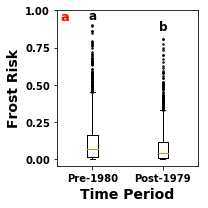

In [24]:

#calculate mean and standard deviations for pre-1980 and post-1979 frost risk among all species
means = [merged['Frost_Suffered_Pre80'].mean(), merged['Frost_Suffered_Post79'].mean()]
SEs = [merged['Frost_Suffered_Pre80'].sem(), merged['Frost_Suffered_Post79'].sem()]
print means

#create figure 2
plt.clf()
fig = plt.figure(figsize=(3, 3))

#plt1 = plt.bar([1,2], means, width = 0.9,
        #color = 'blue', alpha=0.6, yerr=SEs)
#plt1 = plt.boxplot(merged['Frost_Suffered_Pre80'], 1)
#plt2 = plt.boxplot(merged['Frost_Suffered_Post79'], 2)
boxData = [merged['Frost_Suffered_Pre80'], merged['Frost_Suffered_Post79']]
plt1 = plt.boxplot(boxData, whis = [5,95], 
                   flierprops=dict( markersize=1.5))



#plt.ylim(0,.15)
plt.xlabel('Time Period', fontweight = 'bold', fontsize = 14 )
plt.ylabel('Frost Risk', fontweight = 'bold', fontsize = 14 )
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.0],fontweight = 'bold', fontsize = 10 )
plt.xticks([1,2], ['Pre-1980', 'Post-1979'],fontweight = 'bold', fontsize = 10 )

plt.text(0.55,0.999, "a", fontweight = 'bold', fontsize = 13, color = 'red', horizontalalignment= 'left', verticalalignment= 'top' )
plt.text(1, 0.92, "a", fontweight = 'bold', fontsize = 12, horizontalalignment= 'center', verticalalignment= 'bottom' )
plt.text(2, 0.85, "b", fontweight = 'bold', fontsize = 12, horizontalalignment= 'center', verticalalignment= 'bottom' )


plt.tight_layout()
plt.savefig('Fig_2a.jpg', dpi = 600)

In [25]:

invasData = merged[merged['Invasive']== 1]
nativeData = merged[merged['Invasive']== 0]

print len(invasData)
print len(nativeData)


invas_Pre80Mean = invasData['Frost_Suffered_Pre80'].mean()
invas_Post79Mean = invasData['Frost_Suffered_Post79'].mean()
native_Pre80Mean = nativeData['Frost_Suffered_Pre80'].mean()
native_Post79Mean = nativeData['Frost_Suffered_Post79'].mean()

print 'invas_pre80: ', invas_Pre80Mean
print 'invas_post79: ', invas_Post79Mean
print 'native_pre80: ', native_Pre80Mean
print 'native_post79: ', native_Post79Mean

invas_Pre80SE = invasData['Frost_Suffered_Pre80'].std()/(len(invasData)**0.5)
invas_Post79SE = invasData['Frost_Suffered_Post79'].std()/(len(invasData)**0.5)
native_Pre80SE = nativeData['Frost_Suffered_Pre80'].std()/(len(invasData)**0.5)
native_Post79SE = nativeData['Frost_Suffered_Post79'].std()/(len(invasData)**0.5)

137
1503
invas_pre80:  0.0877628080318
invas_post79:  0.0679999336589
native_pre80:  0.124776139299
native_post79:  0.0891065437821


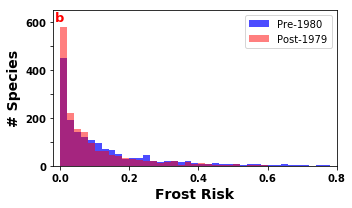

In [26]:
#Create Figure 2b
plt.clf()
fig = plt.figure(figsize=(5, 3))

histbins=np.arange(0, 0.8, 0.02)


plt.ylim(0,650)
plt.xlim(-0.02,0.7)

plt1 = plt.hist(merged['Frost_Suffered_Pre80'], bins = histbins, color = 'blue', alpha = 0.7, label = "Pre-1980")
plt2 = plt.hist(merged['Frost_Suffered_Post79'], bins = histbins, color = 'red', alpha = 0.5, label = "Post-1979")

pyplot.legend(loc='upper right')


plt.xlabel('Frost Risk', fontweight = 'bold', fontsize = 14 )
plt.ylabel('# Species', fontweight = 'bold', fontsize = 14 )

plt.yticks([0,100,200,300,400,500, 600], ['0', '', '200', '', '400', '', '600'], fontweight = 'bold', fontsize = 10 )
plt.xticks([0.0, 0.2, 0.4 ,0.6, 0.8], fontweight = 'bold', fontsize = 10 )

plt.text(-0.015,645, "b", fontweight = 'bold', fontsize = 13, color = 'red', horizontalalignment= 'left', verticalalignment= 'top' )


plt.tight_layout()

plt.savefig('Fig_2b.jpg', dpi = 600)
plt.show()

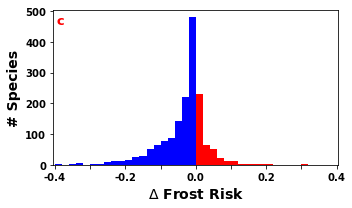

In [27]:
plt.clf()
fig = plt.figure(figsize=(5, 3))

histbins=np.arange(-0.4, 0.4, 0.02)

#plt.ylim(0,380)
plt.xlim(-0.405,0.405)


lowerFrost = merged[merged['Frost_Suffered_Diff']<=0]
higherFrost = merged[merged['Frost_Suffered_Diff']>0]

plt1 = plt.hist(lowerFrost['Frost_Suffered_Diff'], bins = histbins, color = 'blue')
plt2 = plt.hist(higherFrost['Frost_Suffered_Diff'], bins = histbins, color = 'red')


plt.xlabel('$\Delta$ Frost Risk', fontweight = 'bold', fontsize = 14 )
plt.ylabel('# Species', fontweight = 'bold', fontsize = 14 )

plt.yticks([0,100,200,300,400, 500], fontweight = 'bold', fontsize = 10 )
plt.xticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4],['-0.4', '', '-0.2', '', '0.0', '', '0.2', '', '0.4'], fontweight = 'bold', fontsize = 10 )

plt.text(-0.395,490, "c", fontweight = 'bold', fontsize = 13, color = 'red', horizontalalignment= 'left', verticalalignment= 'top' )


plt.tight_layout()
plt.savefig('Fig_2c.jpg', dpi = 600)
plt.show()


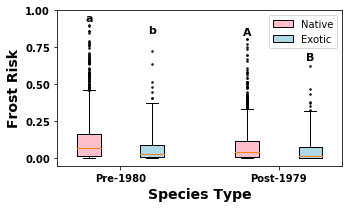

In [28]:
#Create Fig 4

plt.clf()
fig = plt.figure(figsize=(5, 3))



#plt1 = plt.bar([1,4], [native_Pre80Mean, native_Post79Mean], width = 0.9,
#        color = 'blue', alpha=0.7, yerr=[native_Pre80SE, native_Post79SE], label = "Native")
#plt2 = plt.bar([2,5], [invas_Pre80Mean, invas_Post79Mean], width = 0.9,
#        color = 'red', alpha=0.4, yerr=[invas_Pre80SE, invas_Post79SE], label = "Exotic")

nativeboxData = [nativeData['Frost_Suffered_Pre80'], nativeData['Frost_Suffered_Post79']]

invasiveboxData = [invasData['Frost_Suffered_Pre80'], invasData['Frost_Suffered_Post79']]

plt1 = plt.boxplot(nativeboxData, positions = [1,3.5], whis = [5,95], 
                  patch_artist=True, flierprops=dict( markersize=1.5), boxprops=dict(facecolor="pink"))

plt2 = plt.boxplot(invasiveboxData, positions = [2,4.5], whis = [5,95], 
                  patch_artist=True, flierprops=dict( markersize=1.5), boxprops=dict(facecolor="lightblue"))


        
legend((plt1["boxes"][0], plt2["boxes"][0]), ('Native', 'Exotic'))

    


plt.ylim(-0.05,1)
plt.xlim(0.5, 5)

plt.xticks([1.5, 4], ['Pre-1980', 'Post-1979'],fontweight = 'bold', fontsize = 10 )
plt.yticks([0.0, 0.25, 0.50, 0.75, 1.0],fontweight = 'bold', fontsize = 10 )

plt.xlabel('Species Type', fontweight = 'bold', fontsize = 14 )
plt.ylabel('Frost Risk', fontweight = 'bold', fontsize = 14 )




plt.text(1, 0.98, "a", fontweight = 'bold', color = 'black', fontsize = 11, horizontalalignment= 'center', verticalalignment= 'top' )
plt.text(2, 0.9, "b", fontweight = 'bold', color = 'black', fontsize = 11, horizontalalignment= 'center', verticalalignment= 'top' )


plt.text(3.5, 0.82, "A", fontweight = 'bold', color = 'black', fontsize = 11, horizontalalignment= 'center', verticalalignment= 'bottom' )
plt.text(4.5, 0.65, "B", fontweight = 'bold', color = 'black', fontsize = 11, horizontalalignment= 'center', verticalalignment= 'bottom' )


plt.tight_layout()
plt.savefig('Fig_4.jpg', dpi = 600)
